# Tarea 4

Se importan las librerias necesarias y se cargan los datos del archivo "interferometria.rad"

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import sigma_clip

In [2]:
data = np.genfromtxt('interferometria.rad', comments='*', dtype='str')

In [3]:
Temp  = np.array(data[:,9:], dtype='float')
Hrs   = np.array(data[:,0], dtype='str')
Coord = np.array(data[:,1:3],dtype='float')

# Pasamos a radianes
Coord[:,0] = Coord[:,0]*np.pi/180
Coord[:,1]= Coord[:,1]*np.pi/180

Promediamos los canales:

In [33]:
Temp_mean = np.zeros(len(Temp))

for i in range(len(Temp_mean)):
    Temp_mean[i] = np.mean(Temp[i,:])
    
# creamos pandas

data = pd.DataFrame()
data['hrs']     = Hrs 
data['coord_a'] = Coord[:,0]
data['coord_e'] = Coord[:,1]
data['temp']    = Temp_mean

Graficamos

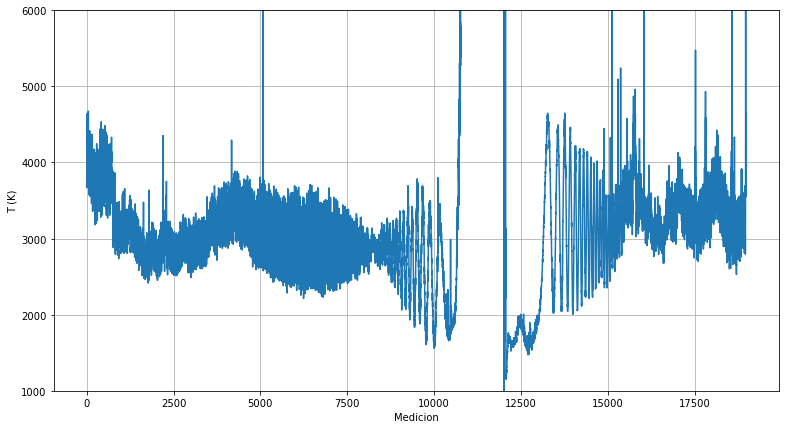

In [35]:
plt.figure(figsize=(13,7))
plt.plot(np.array(data.index), data['temp'])
plt.ylim(1000,6000)
plt.xlabel('Medicion')
plt.ylabel('T (K)')
plt.grid()
plt.show()

Separamos los datos de mañana y tarde:

In [141]:
data_m = data[11497:].reset_index()
data_t = data[:11497].reset_index()

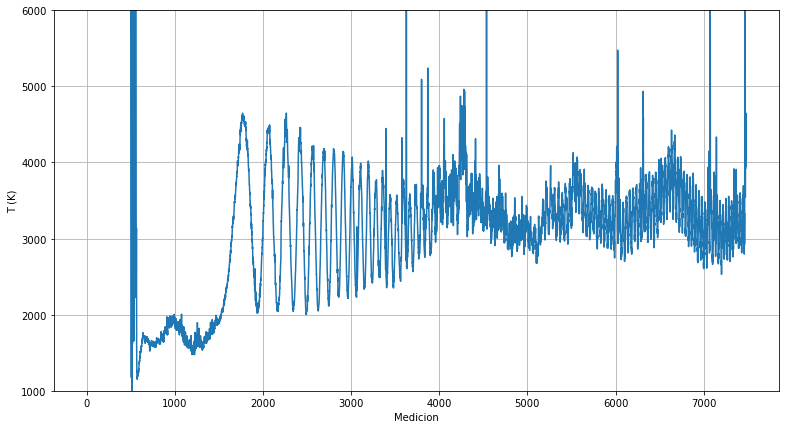

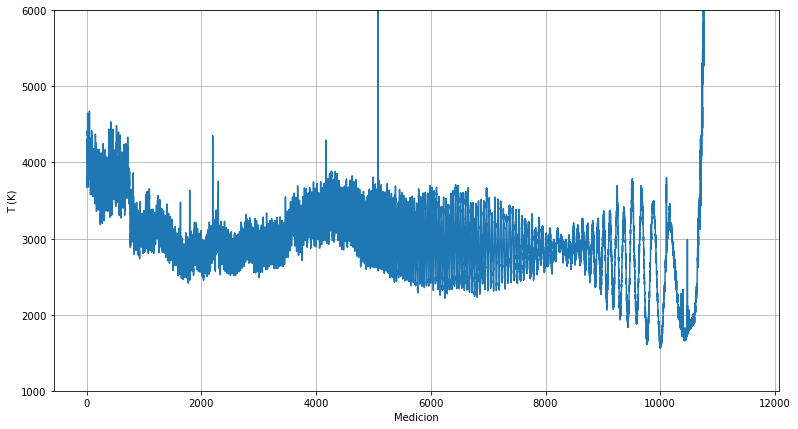

In [137]:
# grafico mañana
plt.figure(figsize=(13,7))
plt.plot(np.array(data_m.index),data_m['temp'])
plt.ylim(1000,6000)
plt.xlabel('Medicion')
plt.ylabel('T (K)')
plt.grid()
plt.show()

# grafico tarde
plt.figure(figsize=(13,7))
plt.plot(np.array(data_t.index),data_t['temp'])
plt.ylim(1000,6000)
plt.xlabel('Medicion')
plt.ylabel('T (K)')
plt.grid()
plt.show()

Por inspeccion se puede notar que los datos que corresponden a muy temprano al amanecer y muy tarde al atardecer tienen ruido, por lo que se eliminan los datos

In [142]:
data_m = data_m[2000:]
data_t = data_t[:10000]

Luego, todos los datos que esten alejados mas de 0.5 veces el RMS del RMS se filtran

In [143]:
rms_m = np.sqrt(np.mean(data_m['temp']**2))
rms_t = np.sqrt(np.mean(data_t['temp']**2))

data_m = data_m[abs(data_m['temp']-rms_m)<=0.5*rms_m]
data_t = data_t[abs(data_t['temp']-rms_t)<=0.5*rms_t]

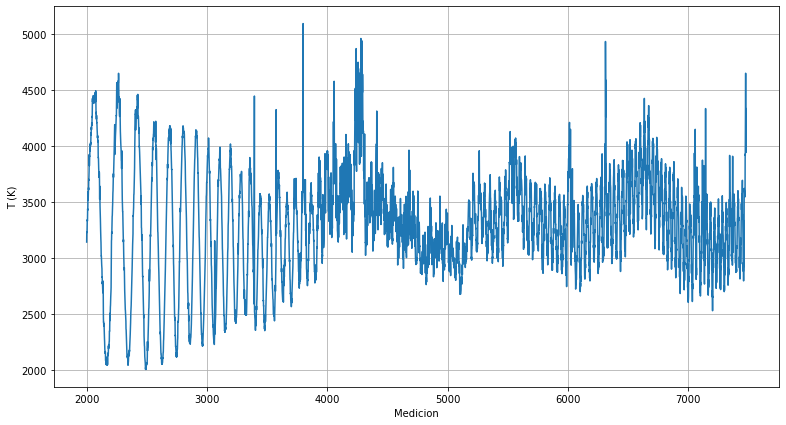

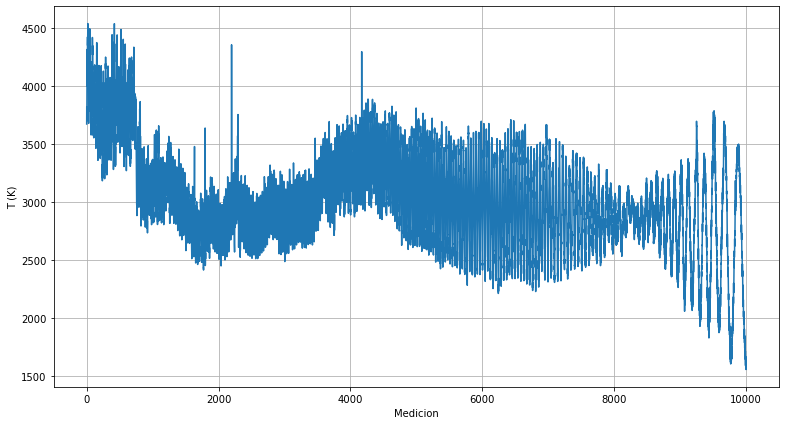

In [144]:
# grafico mañana
plt.figure(figsize=(13,7))
plt.plot(np.array(data_m.index),data_m['temp'])
plt.xlabel('Medicion')
plt.ylabel('T (K)')
plt.grid()
plt.show()

# grafico tarde
plt.figure(figsize=(13,7))
plt.plot(np.array(data_t.index),data_t['temp'])
plt.xlabel('Medicion')
plt.ylabel('T (K)')
plt.grid()
plt.show()

In [112]:
rms_t

3114.4464385138162